## Set Up

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import pandas as pd

## Get the data

In [8]:
SMSs = pd.read_csv('spam.csv', encoding='latin-1')
SMSs = SMSs[['v1', 'v2']].rename(columns={'v1': 'ham/spam', 'v2': 'content'})
SMSs = SMSs.sample(frac=1)
SMSs.shape

(5572, 2)

## Split the data

In [3]:
split = int(SMSs.shape[0]*0.66)
ds_train = SMSs.loc[:split, 'content'].to_numpy()
ds_test = SMSs.loc[split+1:, 'content'].to_numpy()
train_labels = SMSs.loc[:split, 'ham/spam'].apply(lambda x: 1 if x=='spam' else 0).to_numpy()
test_labels = SMSs.loc[split+1:, 'ham/spam'].apply(lambda x: 1 if x=='spam' else 0).to_numpy()
ds_train[0], train_labels[0]

('lyricalladie(21/F) is inviting you to be her friend. Reply YES-910 or NO-910. See her: www.SMS.ac/u/hmmross STOP? Send STOP FRND to 62468',
 1)

## Preprocess the data

In [4]:
max_length = 50
vocab_size = 5000
embedding_size = 20

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(ds_train)

train_sentences = tokenizer.texts_to_sequences(ds_train)
train_sequences = pad_sequences(train_sentences, maxlen=max_length, padding='post', truncating='post')

test_sentences = tokenizer.texts_to_sequences(ds_test)
test_sequences = pad_sequences(test_sentences, maxlen=max_length, padding='post', truncating='post')

train_sequences.shape, test_sequences.shape

((1042, 50), (621, 50))

## Define function to fit the model and show the results

In [5]:
def fit_and_show(model, num_epochs=20):
    model.summary()
    history = model.fit(train_sequences, train_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels), verbose=0)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.show()
    classes = model.predict(test_sequences)
    for i in range(classes.shape[0]):
        if test_labels[i] == 0:
            print('SMS: ' +  ds_test[i])
            print('Spam ?: ', test_labels[i]==1)
            print('Forecast: ', round(classes[i,0])==1, end='\n\n')
            break
    for i in range(classes.shape[0]):
        if test_labels[i] == 1:
            print('SMS: ' +  ds_test[i])
            print('Spam ?: ', test_labels[i]==1)
            print('Forecast: ', round(classes[i,0])==1, end='\n\n')
            break

## Use a LSTM model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 20)          100000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 103,301
Trainable params: 103,301
Non-trainable params: 0
_________________________________________________________________


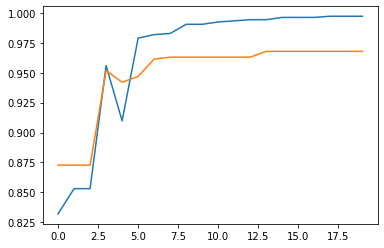

SMS: Stupid.its not possible
Spam ?:  False
Forecast:  False

SMS: accordingly. I repeat, just text the word ok on your mobile phone and send
Spam ?:  True
Forecast:  False



In [11]:
model_lstm = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_size),
                             tf.keras.layers.LSTM(embedding_size),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
fit_and_show(model_lstm)

## Use a GRU model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 20)          100000    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                5184      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 105,217
Trainable params: 105,217
Non-trainable params: 0
_________________________________________________________________


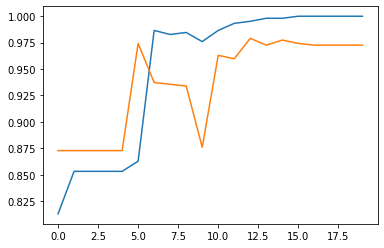

SMS: Stupid.its not possible
Spam ?:  False
Forecast:  False

SMS: accordingly. I repeat, just text the word ok on your mobile phone and send
Spam ?:  True
Forecast:  True



In [10]:
model_lstm = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_size),
                             tf.keras.layers.GRU(32),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
fit_and_show(model_lstm)

## Use a bidirectionnal LSTM model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 20)          100000    
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                6560      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 106,601
Trainable params: 106,601
Non-trainable params: 0
_________________________________________________________________


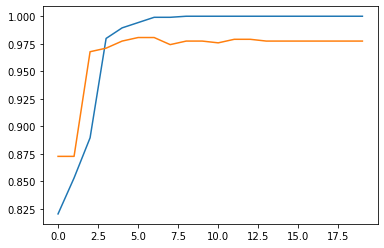

SMS: Stupid.its not possible
Spam ?:  False
Forecast:  False

SMS: accordingly. I repeat, just text the word ok on your mobile phone and send
Spam ?:  True
Forecast:  False



In [6]:
model_lstm = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_size),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_size)),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
fit_and_show(model_lstm)

## Use a bidirectionnal GRU model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 20)          100000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                10368     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 110,433
Trainable params: 110,433
Non-trainable params: 0
_________________________________________________________________


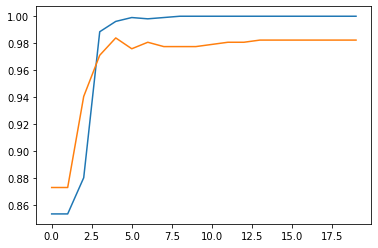

SMS: Stupid.its not possible
Spam ?:  False
Forecast:  False

SMS: accordingly. I repeat, just text the word ok on your mobile phone and send
Spam ?:  True
Forecast:  False



In [7]:
model_gru = tf.keras.Sequential([
                            tf.keras.layers.Embedding(vocab_size, embedding_size),
                            tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy')
fit_and_show(model_gru)